# 크롤러 만들기
>TextBook. 6장 데이터 수집

- 웹 크롤러 이해
- urllib 패키지, BeautifulSoup 패키지 이해 및 활용

### urllib, BeautifulSoup

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
with urlopen('http://naver.com') as response:
    html = response.read()
    bs = BeautifulSoup(html, 'html.parser')
    
    for element in bs.find_all(attrs={'class':'title elss'})[0:2]:
        print(element)

<strong class="title elss">국내 대표 경차 '2023년형 모닝' 출시…1220만원부터</strong>
<strong class="title elss">BMW, 소형 딱지 떼고 등장한 3세대 X1..전기차 주행거리는 438㎞</strong>


In [3]:
with urlopen('http://naver.com') as response:
    html = response.read()
    bs = BeautifulSoup(html, 'html.parser')
    
    for element in bs.find_all(id='veta_top')[0:2]:
        print(element)

<div id="veta_top"> <div id="veta_top_inner" style="height:135px"> </div> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div>


In [4]:
with urlopen('http://naver.com') as response:
    html = response.read()
    bs = BeautifulSoup(html, 'html.parser')
    
    for element in bs.find_all(id='veta_top')[0:2]:
        print(element)
    
    print('-'*100)
    for element in bs.find_all(attrs = {'class' : 'title elss'})[0:2]:
        print(element)

<div id="veta_top"> <div id="veta_top_inner" style="height:135px"> </div> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div>
----------------------------------------------------------------------------------------------------
<strong class="title elss">최소 공간 최대 수납, 드레스룸</strong>
<strong class="title elss">집 안 곳곳 반려견을 위한 설계, 애정이 가득한 단독주택 </strong>


[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/banner/details/security/?=main&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #94a0a9">다운로드</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>, <a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span 
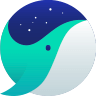
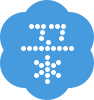

In [6]:
with urlopen('http://naver.com') as response:
    html = response.read()
    bs   = BeautifulSoup(html, 'html.parser')
    
    elements = bs.select('div > a')
    print(elements)

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [15]:
# N날씨
url = 'https://weather.naver.com/today/'

In [21]:
with urlopen(url) as response:
    html = response.read()
    bs = BeautifulSoup(html, 'html.parser')

In [22]:
#now > div > div.weather_area > div.weather_now > div > strong

In [23]:
selector = '#now > div > div.weather_area > div.weather_now > div > strong'

In [24]:
elements = bs.select(selector)
elements

[<strong class="current">
 <span class="blind">현재 온도</span>21.9<span class="degree">°</span>
 </strong>]

In [25]:
type(elements)

bs4.element.ResultSet

In [27]:
temperature = elements[0].get_text()
temperature = temperature.strip()
temperature

'현재 온도21.9°'

In [28]:
# 주간예보 (일별)
selector = '#weekly > div.scroll_control.end_left > div > ul'
selector = '#weekly > div.scroll_control.end_left > div > ul > li:nth-child(3)'

In [29]:
elements = bs.select(selector)
elements

[<li class="week_item">
 <div class="day_data">
 <div class="cell_date">
 <span class="date_inner">
 <strong class="day">토</strong><span class="date">6.11.</span>
 </span>
 </div>
 <div class="cell_weather">
 <span class="weather_inner" data-wetr-cd="7" data-wetr-txt="흐림">
 <strong class="inner_text left">
 <span class="timeslot">오전</span>
 <span class="rainfall"><span class="blind">강수확률</span>30%</span>
 </strong>
 <i class="ico _cnLazy" data-ico="ico_wt7"><span class="blind">흐림</span></i>
 </span>
 <span class="weather_inner" data-wetr-cd="15" data-wetr-txt="구름많고 한때 소나기">
 <i class="ico _cnLazy" data-ico="ico_wt15"><span class="blind">구름많고 한때 소나기</span></i>
 <strong class="inner_text">
 <span class="timeslot">오후</span>
 <span class="rainfall"><span class="blind">강수확률</span>40%</span>
 </strong>
 </span>
 </div>
 <div class="cell_temperature">
 <strong class="temperature">
 <span class="lowest"><span class="blind">최저기온</span>19°</span>
 <span class="bar">/</span>
 <span class="highest

In [30]:
len(elements)

1

In [31]:
temp = elements[0].get_text()
temp

'\n\n\n\n토6.11.\n\n\n\n\n\n오전\n강수확률30%\n\n흐림\n\n\n구름많고 한때 소나기\n\n오후\n강수확률40%\n\n\n\n\n\n최저기온19°\n/\n최고기온29°\n\n\n\n'

In [32]:
arr_elements = list()

for i in range(100):
    selector = '#weekly > div.scroll_control.end_left > div > ul > li:nth-child({n})'.format(n=i)
    elements = bs.select(selector)
    
    if len(elements) > 0:
        temp_text = elements[0].get_text()
        temp_text = temp_text.replace('\n', ' ')
        temp_text = temp_text.strip()
        arr_elements.append(temp_text)

In [33]:
arr_elements[0]

'오늘6.09.      오전 강수확률70%  흐리고 가끔 비   구름많고 한때 소나기  오후 강수확률60%      최저기온17° / 최고기온24°'

In [34]:
arr_elements[1]

'내일6.10.      오전 강수확률0%  맑음   흐림  오후 강수확률30%      최저기온17° / 최고기온29°'

In [35]:
arr_elements[-1]

'일6.19.      오전 강수확률30%  흐림   흐림  오후 강수확률30%      최저기온19° / 최고기온29°'

In [36]:
len(arr_elements)

11

In [37]:
for i in range(len(arr_elements)):
    print(arr_elements[i])

오늘6.09.      오전 강수확률70%  흐리고 가끔 비   구름많고 한때 소나기  오후 강수확률60%      최저기온17° / 최고기온24°
내일6.10.      오전 강수확률0%  맑음   흐림  오후 강수확률30%      최저기온17° / 최고기온29°
토6.11.      오전 강수확률30%  흐림   구름많고 한때 소나기  오후 강수확률40%      최저기온19° / 최고기온29°
일6.12.      오전 강수확률0%  맑음   구름많음  오후 강수확률30%      최저기온17° / 최고기온30°
월6.13.      오전 강수확률30%  구름많음   구름많음  오후 강수확률30%      최저기온19° / 최고기온28°
화6.14.      오전 강수확률30%  흐림   흐림  오후 강수확률30%      최저기온17° / 최고기온26°
수6.15.      오전 강수확률30%  구름많음   맑음  오후 강수확률0%      최저기온16° / 최고기온29°
목6.16.      오전 강수확률0%  맑음   맑음  오후 강수확률0%      최저기온17° / 최고기온29°
금6.17.      오전 강수확률30%  구름많음   구름많음  오후 강수확률30%      최저기온19° / 최고기온30°
토6.18.      오전 강수확률30%  구름많음   구름많음  오후 강수확률30%      최저기온20° / 최고기온30°
일6.19.      오전 강수확률30%  흐림   흐림  오후 강수확률30%      최저기온19° / 최고기온29°


In [38]:
arr_elements[0].split()

['오늘6.09.',
 '오전',
 '강수확률70%',
 '흐리고',
 '가끔',
 '비',
 '구름많고',
 '한때',
 '소나기',
 '오후',
 '강수확률60%',
 '최저기온17°',
 '/',
 '최고기온24°']